# Display preprocessed data

Set up helper functions and read in required data

In [1]:
from map_helper import coords, radar_colormap
import numpy as np
from scipy.spatial import cKDTree
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data_dir = "../data"
geo_data_dir = data_dir + "/geo"

interp_lons = np.loadtxt("{}/now_interp_lons.txt".format(geo_data_dir))
interp_lats = np.loadtxt("{}/now_interp_lats.txt".format(geo_data_dir))

pts = coords(interp_lons, interp_lats)
tree = cKDTree(pts)

cmap = radar_colormap()
classes = np.array(list(range(0, 85, 5)))
norm = BoundaryNorm(classes, ncolors=cmap.N)

# Display 512 x 512 km grids

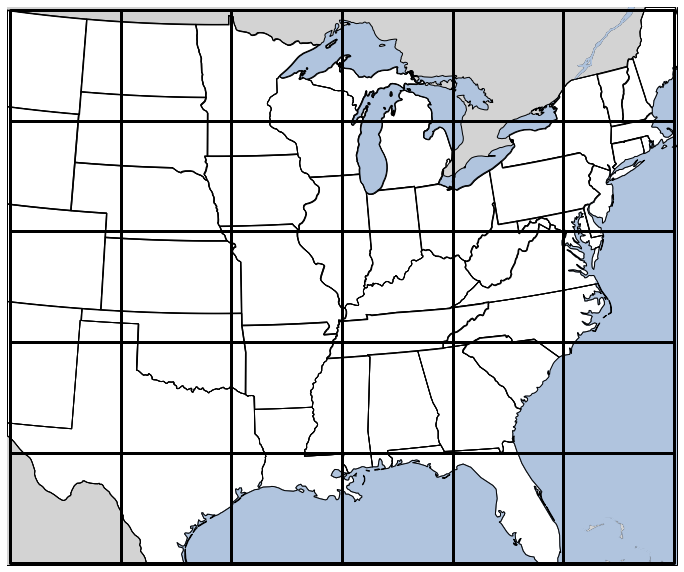

In [2]:
from map_helper import draw_geography, plot_box_stats, draw_box
import cartopy
import cartopy.crs as ccrs

plt.rcParams['figure.figsize'] = 12, 12

from_proj = ccrs.PlateCarree()
projection = cartopy.crs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5, false_easting=0.0, 
                                         false_northing=0.0, standard_parallels=(29.5, 45.5), globe=None)

ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

# Display composites

### Multi-Hazard

[Errno 2] No such file or directory: '../data/all/multi/5.0_grid_all_multi_pmm.npy'


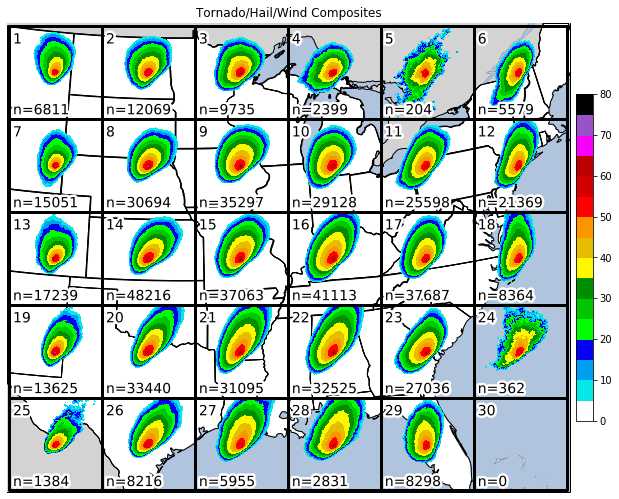

In [3]:
analysis_type = 'all'
hazard_type = 'multi'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_{}_pmm.npy".format(data_loc,
                                                fid,
                                                analysis_type,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               analysis_type,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Tornado/Hail/Wind Composites")

plot_box_stats(ax, counts)

### Tornado

[Errno 2] No such file or directory: '../data/all/tor/5_grid_all_tor_pmm.npy'


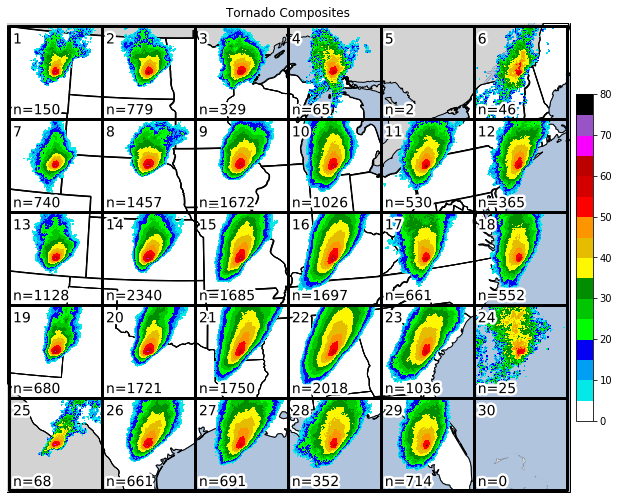

In [4]:
analysis_type = 'all'
hazard_type = 'tor'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_{}_pmm.npy".format(data_loc,
                                                fid,
                                                analysis_type,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               analysis_type,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Tornado Composites")

plot_box_stats(ax, counts)

### Hail

[Errno 2] No such file or directory: '../data/all/hail/5.0_grid_all_hail_pmm.npy'


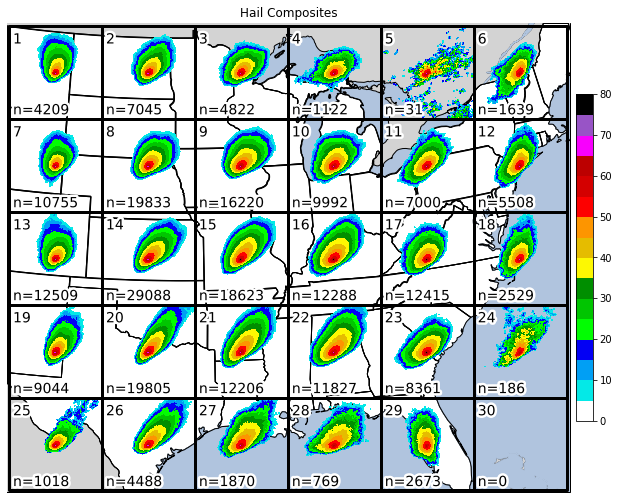

In [5]:
analysis_type = 'all'
hazard_type = 'hail'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_{}_pmm.npy".format(data_loc,
                                                fid,
                                                analysis_type,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               analysis_type,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Hail Composites")

plot_box_stats(ax, counts)

### Wind

[Errno 2] No such file or directory: '../data/all/wind/5.0_grid_all_wind_pmm.npy'


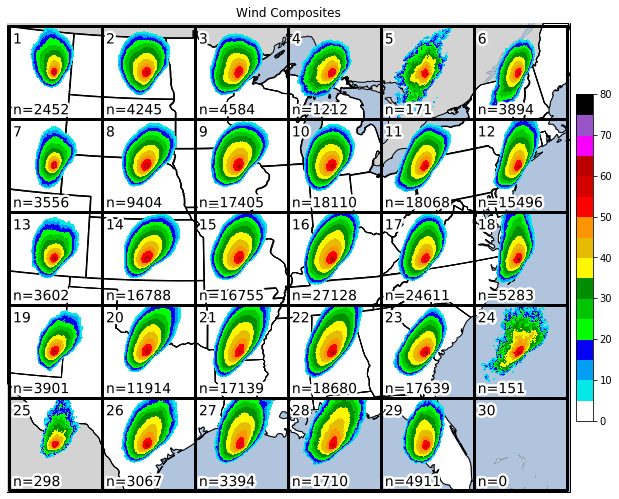

In [6]:
analysis_type = 'all'
hazard_type = 'wind'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_{}_pmm.npy".format(data_loc,
                                                fid,
                                                analysis_type,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               analysis_type,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Wind Composites")

plot_box_stats(ax, counts)

# Seasonal

### Warm Season Tornado

[Errno 2] No such file or directory: '../data/season/warm_tor/5_grid_warm_tor_pmm.npy'


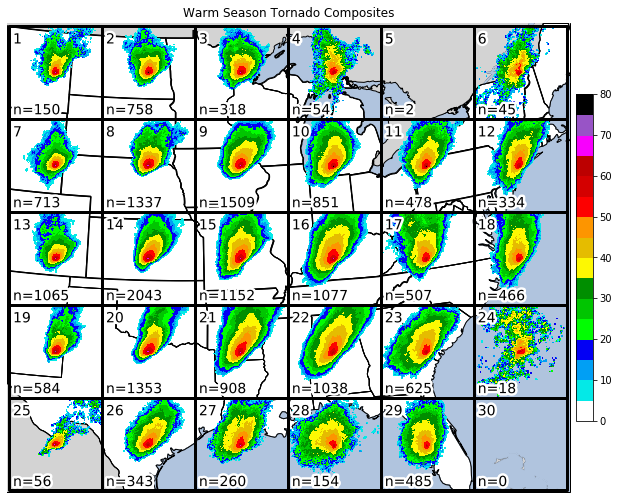

In [7]:
analysis_type = 'season'
hazard_type = 'warm_tor'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Warm Season Tornado Composites")

plot_box_stats(ax, counts)

### Cool Season Tornado

[Errno 2] No such file or directory: '../data/season/cool_tor/5_grid_cool_tor_pmm.npy'
[Errno 2] No such file or directory: '../data/season/cool_tor/24_grid_cool_tor_pmm.npy'
[Errno 2] No such file or directory: '../data/season/cool_tor/28_grid_cool_tor_pmm.npy'


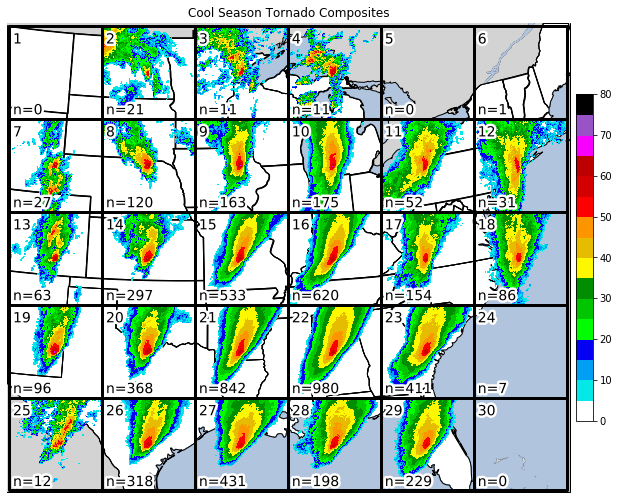

In [8]:
analysis_type = 'season'
hazard_type = 'cool_tor'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Cool Season Tornado Composites")

plot_box_stats(ax, counts)

### Warm Season Hail

[Errno 2] No such file or directory: '../data/season/warm_hail/5.0_grid_warm_hail_pmm.npy'


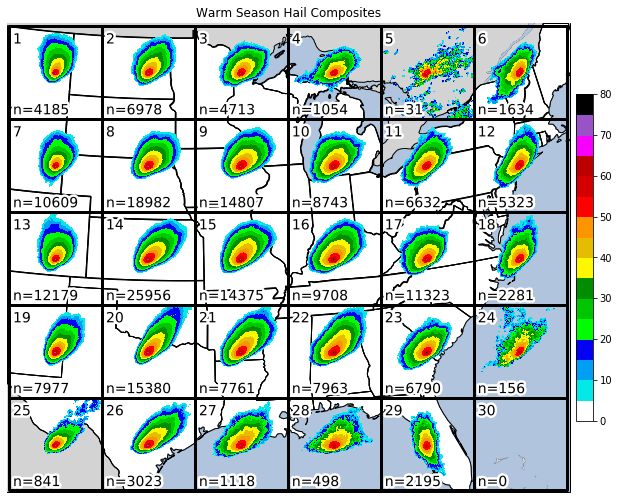

In [9]:
analysis_type = 'season'
hazard_type = 'warm_hail'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Warm Season Hail Composites")

plot_box_stats(ax, counts)

### Cool Season Hail

[Errno 2] No such file or directory: '../data/season/cool_hail/5.0_grid_cool_hail_pmm.npy'
[Errno 2] No such file or directory: '../data/season/cool_hail/28.0_grid_cool_hail_pmm.npy'


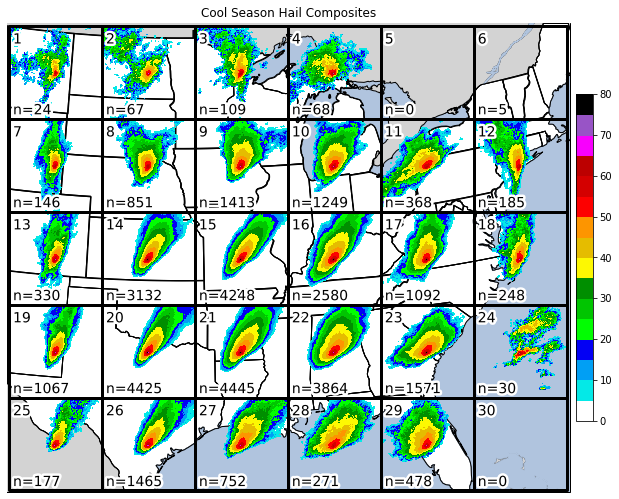

In [10]:
analysis_type = 'season'
hazard_type = 'cool_hail'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Cool Season Hail Composites")

plot_box_stats(ax, counts)

### Warm Season Wind

[Errno 2] No such file or directory: '../data/season/warm_wind/5.0_grid_warm_wind_pmm.npy'


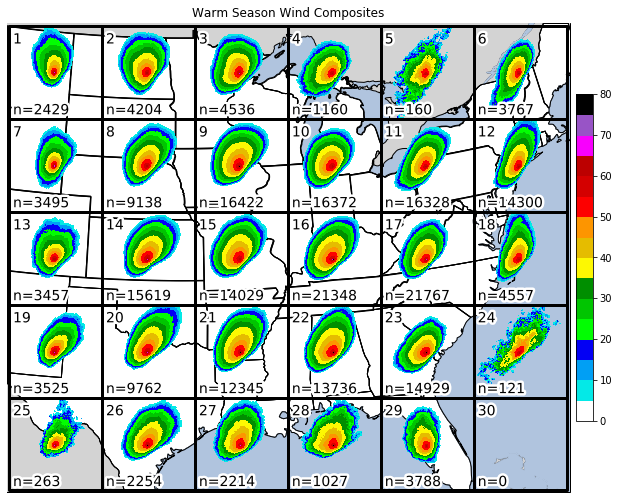

In [11]:
analysis_type = 'season'
hazard_type = 'warm_wind'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Warm Season Wind Composites")

plot_box_stats(ax, counts)

### Cool Season Wind

[Errno 2] No such file or directory: '../data/season/cool_wind/5.0_grid_cool_wind_pmm.npy'


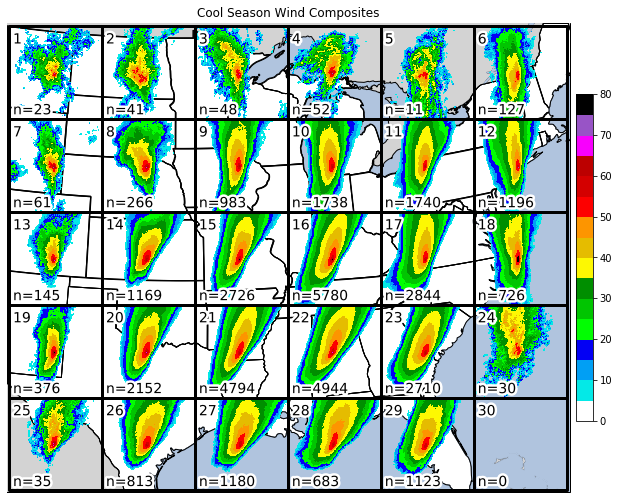

In [12]:
analysis_type = 'season'
hazard_type = 'cool_wind'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_{}_pmm.npy".format(data_loc,
                                                fid,
                                                hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_{}_stats.csv".format(data_loc,
                                                               fid,
                                                               hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Cool Season Wind Composites")

plot_box_stats(ax, counts)

# Diurnal cycle

### Daytime tornado

[Errno 2] No such file or directory: '../data/diurnal/day_tor/5_grid_new_day_tor_pmm.npy'


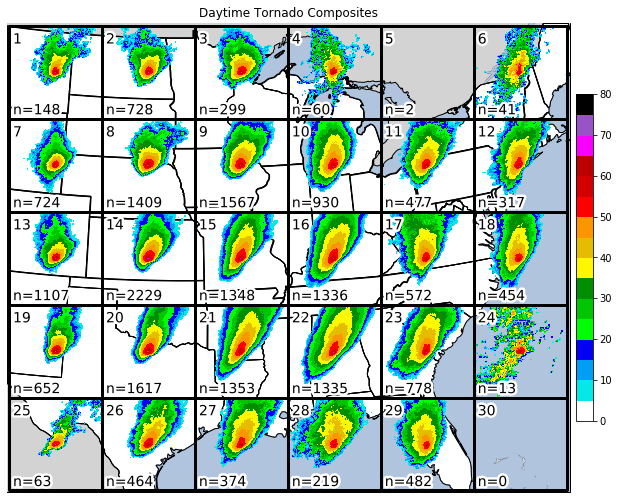

In [13]:
analysis_type = 'diurnal'
hazard_type = 'day_tor'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Daytime Tornado Composites")

plot_box_stats(ax, counts)

### Night Tornadoes

[Errno 2] No such file or directory: '../data/diurnal/night_tor/5_grid_new_night_tor_pmm.npy'
[Errno 2] No such file or directory: '../data/diurnal/night_tor/28_grid_new_night_tor_pmm.npy'


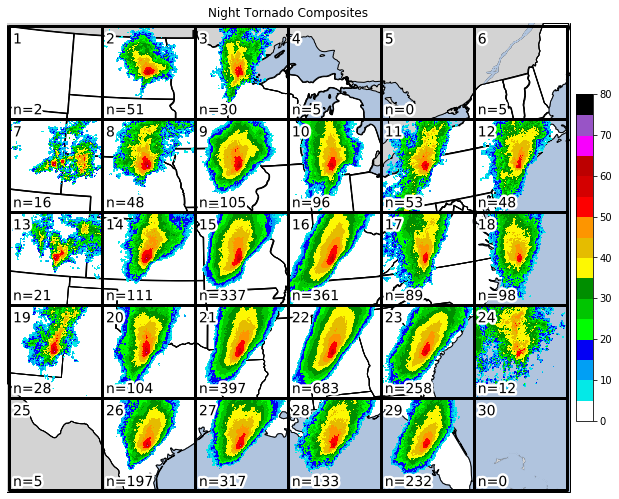

In [14]:
analysis_type = 'diurnal'
hazard_type = 'night_tor'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Night Tornado Composites")

plot_box_stats(ax, counts)

### Daytime Hail

[Errno 2] No such file or directory: '../data/diurnal/day_hail/5.0_grid_new_day_hail_pmm.npy'


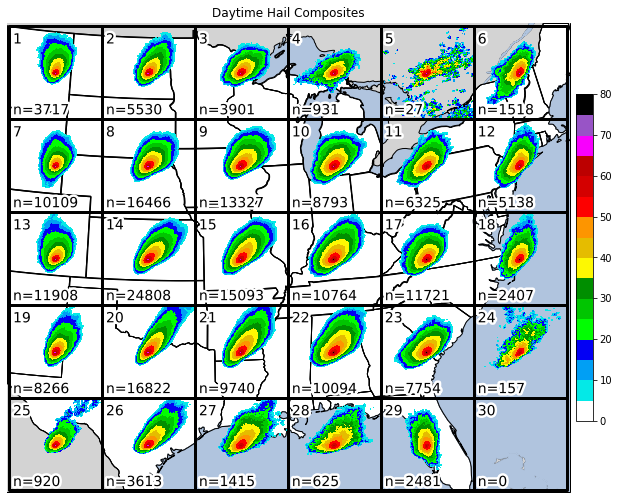

In [15]:
analysis_type = 'diurnal'
hazard_type = 'day_hail'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Daytime Hail Composites")

plot_box_stats(ax, counts)

### Night Hail

[Errno 2] No such file or directory: '../data/diurnal/night_hail/5.0_grid_new_night_hail_pmm.npy'


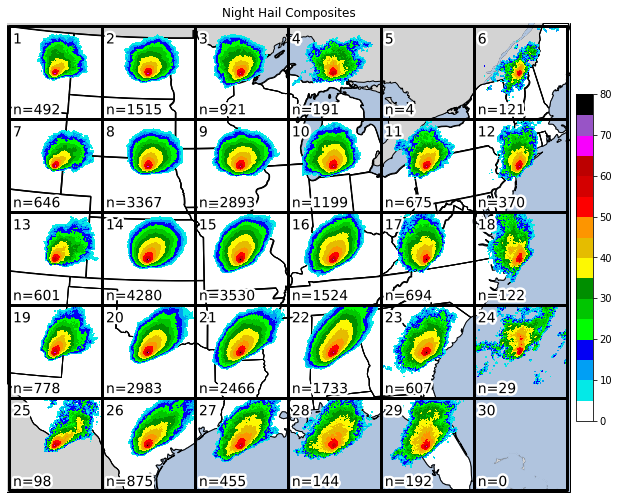

In [16]:
analysis_type = 'diurnal'
hazard_type = 'night_hail'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Night Hail Composites")

plot_box_stats(ax, counts)

### Daytime Wind

[Errno 2] No such file or directory: '../data/diurnal/day_wind/5.0_grid_new_day_wind_pmm.npy'


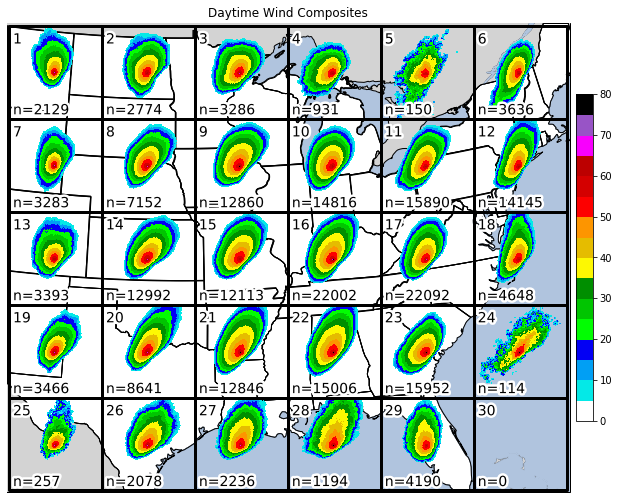

In [17]:
analysis_type = 'diurnal'
hazard_type = 'day_wind'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Daytime Wind Composites")

plot_box_stats(ax, counts)

### Night Wind

[Errno 2] No such file or directory: '../data/diurnal/night_wind/5.0_grid_new_night_wind_pmm.npy'


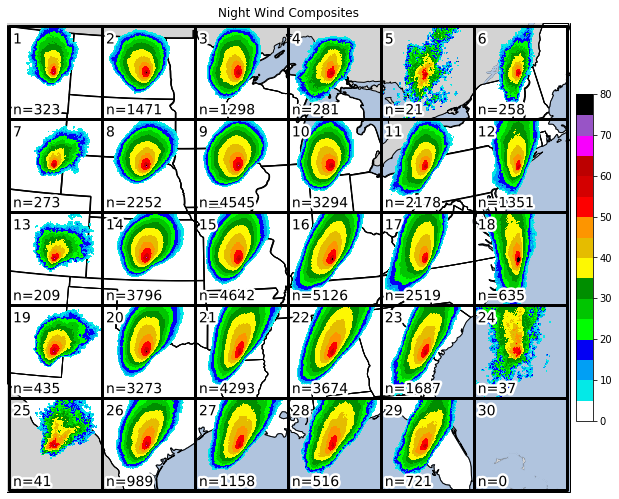

In [18]:
analysis_type = 'diurnal'
hazard_type = 'night_wind'

data_loc = "{}/{}/{}".format(data_dir, analysis_type, hazard_type)

result = np.zeros(shape=interp_lons.shape, dtype=float)

centroids = pd.read_csv("{}/grid_512_centroid.csv".format(geo_data_dir))

codes = [25, 26, 27, 28, 29, 30, 
 19, 20, 21, 22, 23, 24,
 13, 14, 15, 16, 17, 18,
 7, 8, 9, 10, 11, 12,
 1, 2, 3, 4, 5, 6]

counts = {x: 0 for x in codes}

for cidx, (cid, centroid) in enumerate(centroids.iterrows()):
    
    if hazard_type.find("tor") != -1:
        fid = int(centroid.ORIG_FID)
    else:
        fid = centroid.ORIG_FID
        
    try:
        pmm = "{}/{}_grid_new_{}_pmm.npy".format(data_loc,
                                                 fid,
                                                 hazard_type)
        pmm_data = np.flipud(np.load(pmm))

        rbox = pd.read_csv("{}/{}_grid_new_{}_stats.csv".format(data_loc,
                                                                fid,
                                                                hazard_type))
        counts[codes[cidx]] = len(rbox)
        
        if len(rbox) >= 10:
            
            draw_box(lon=centroid.LON,
                     lat=centroid.LAT,
                     tree=tree,
                     pmm_image = pmm_data,
                     out_image=result,
                     out_shape=interp_lons.shape)
    
         
    except Exception as e:
        
        print(e)
        
ax = plt.subplot(1,1,1,projection=projection)
ax.set_extent([-105.55, -74.65, 26.1, 48.1], crs=from_proj)
ax = draw_geography(ax, geo_data_dir=geo_data_dir)

result = np.ma.masked_where(result < 1, result)

mmp = ax.pcolormesh(interp_lons, interp_lats, 5*result+0.001, transform=cartopy.crs.PlateCarree(), 
            cmap=cmap, norm=norm, zorder=7)

plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)

ax.set_title("Night Wind Composites")

plot_box_stats(ax, counts)